#### Data Exploration and Preprocessing 

here First, we need to load the data using Pandas

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
file_path = r'C:\Users\Lenovo\Documents\GitHub\TheUltimate pandas bootcamp\Cognifyz-Data-Mastery-Program\DATASETS\Dataset .csv'
DATASET = pd.read_csv(file_path)

Display the first few rows to get a sense of the data

In [9]:
print("Initial preview of the dataset:")
print(DATASET.head())

Initial preview of the dataset:
   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas

`We use pd.read_csv() to read the data and print(df.head()) to check the top 5 rows, ensuring we know what kind of data we're dealing with.`

### **Understanding the Structure of the Data**

Now, let’s see how many rows and columns we have and the data types

In [13]:
print("Summary of the dataset:")
print(f'The dataset contains {DATASET.shape[0]} rows and {DATASET.shape[1]} columns.\\n')

Summary of the dataset:
The dataset contains 9551 rows and 21 columns.\n


In [14]:
print("Information about the dataset:")
print(DATASET.info())

Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   obj

 `df.shape` tells us the size, and `df.info()` gives a summary, including data types and non-null counts

We have a solid overview of  dataset, which contains 9551 rows and 21 columns. The columns include information about restaurants, such as `Restaurant ID, Restaurant Name, Country Code, City, Cuisines, Average Cost for two, and more.` Let’s continue with our `Level 1 Task 1: Data Exploration and Preprocessing` by addressing missing values and preparing the data.

### **Checking for Missing Values**
Missing data can affect analysis and model performance, so let’s identify and handle them

In [15]:
print("Count of missing values in each column")
print(DATASET.isnull().sum())

Count of missing values in each column
Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


**Handling Missing Values**:

- **Numerical Columns**: Fill with the mean or median.
- **Categorical Columns**: Fill with the mode.

#### Checking for missing values 

In [18]:
missing_values = DATASET.isnull().sum()
print("Count of missing values in each column")
print(missing_values[missing_values > 0])

Count of missing values in each column
Cuisines    9
dtype: int64


This will show columns that have missing values and how many values are missing.

**Cuisines**: Since this column has `9`missing values, we can fill them with a placeholder like "Unknown" or the mode (most common value):

In [21]:
DATASET['Cuisines'].fillna('Unknown', inplace=True)

### **Data Type Conversion**

Its important to see  that the data types for columns are appropriate. For instance, `Country Code` can be an integer, but `Has Table booking` may be better represented as a boolean.

#### Convert `Has Table booking` and  `Has Online delivery` to boolean

In [26]:
DATASET['Has Table booking'] = DATASET['Has Table booking'].apply(lambda x: True if x == 'Yes' else False)
DATASET['Has Online delivery'] = DATASET['Has Online delivery'].apply(lambda x: True if x == 'Yes' else False)

#### Verify data types

In [27]:
print("Updated data types:")
print(DATASET.dtypes)

Updated data types:
Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking          bool
Has Online delivery        bool
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object


### **Distribution of the Target Variable**

Now, let's check the distribution of the target variable (`Aggregate rating`):

Plot the distribution of the `Aggregate rating`

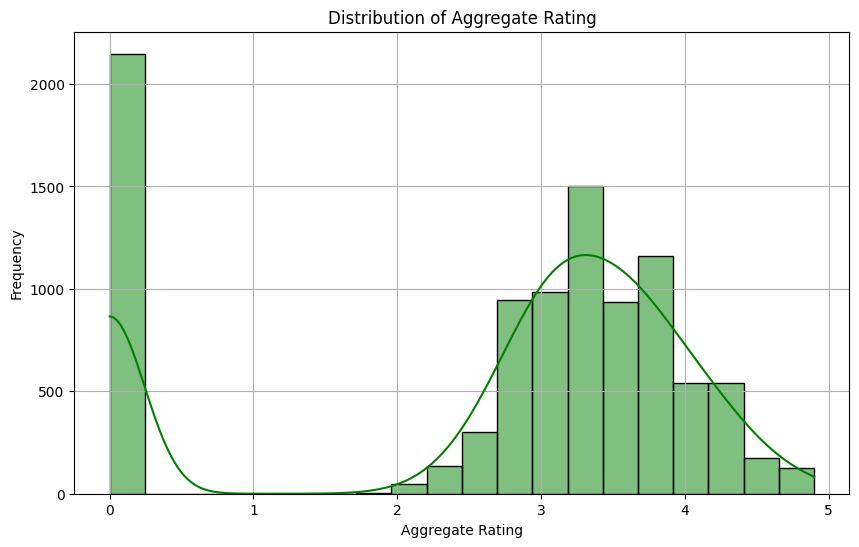

In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(DATASET['Aggregate rating'], bins=20, kde=True, color='green')
plt.title('Distribution of Aggregate Rating')
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

This histogram with a kernel density estimate (KDE) gives a smooth curve showing the distribution of ratings.

### **Class Imbalance Check**

Finally, we are going to check  there is a class imbalance in the `Aggregate rating`:

In [32]:
print("Class distribution for `Aggregate rating`:")
print(DATASET['Aggregate rating'].value_counts())

Class distribution for `Aggregate rating`:
Aggregate rating
0.0    2148
3.2     522
3.1     519
3.4     498
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     400
2.9     381
3.9     335
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     144
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      42
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: count, dtype: int64
